In [1]:
import sys
sys.path.insert(0, 'src') 
import os
import json
from functools import partial

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import argparse
from tot.methods.bfs import solve
from tot.tasks.bio_name import Bio_Name

In [4]:
args = argparse.Namespace(backend='gpt-3.5-turbo-1106', temperature=0.7, task='bio_name', naive_run=False, \
                          prompt_sample=None, method_generate='sample_bionames', \
                          method_evaluate='multi_voters', method_select='greedy', n_generate_sample=3, \
                          n_evaluate_sample=2, n_select_sample=2, \
                          source='GO:BP', bio_type="Biological Process",filter_method='sim', filter_size=5, voting_setting=None)
task = Bio_Name()

In [9]:
def test_example(args, task, idx):
    label = task.get_label(idx)
    final_answer, ys, steps, trie = solve(args, task, idx)
    return final_answer, ys, steps, label, trie


In [6]:
from tot.models import *
gpt = partial(gpt, model=args.backend, temperature=args.temperature)
def get_gpt_similarity_score(process1, process2):
    system_message, user_message = task.similarity_prompt_wrap(process1, process2)
    response = gpt(system_message, user_message)
    similarity_score = task.unwrap_similarity(response)
    return similarity_score

In [11]:
final_answer, ys, steps, label, trie = test_example(args, task, 1)

bfs--get_multivotes_for_bionames--values [1, 0, 1, 1, 1, 0]
bfs--get_multivotes_for_bionames--values [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
bfs--get_multivotes_for_bionames--values [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [12]:
dot = trie.visualize()
# dot.render('viz/trie_visualization_{}'.format(idx), format='png')

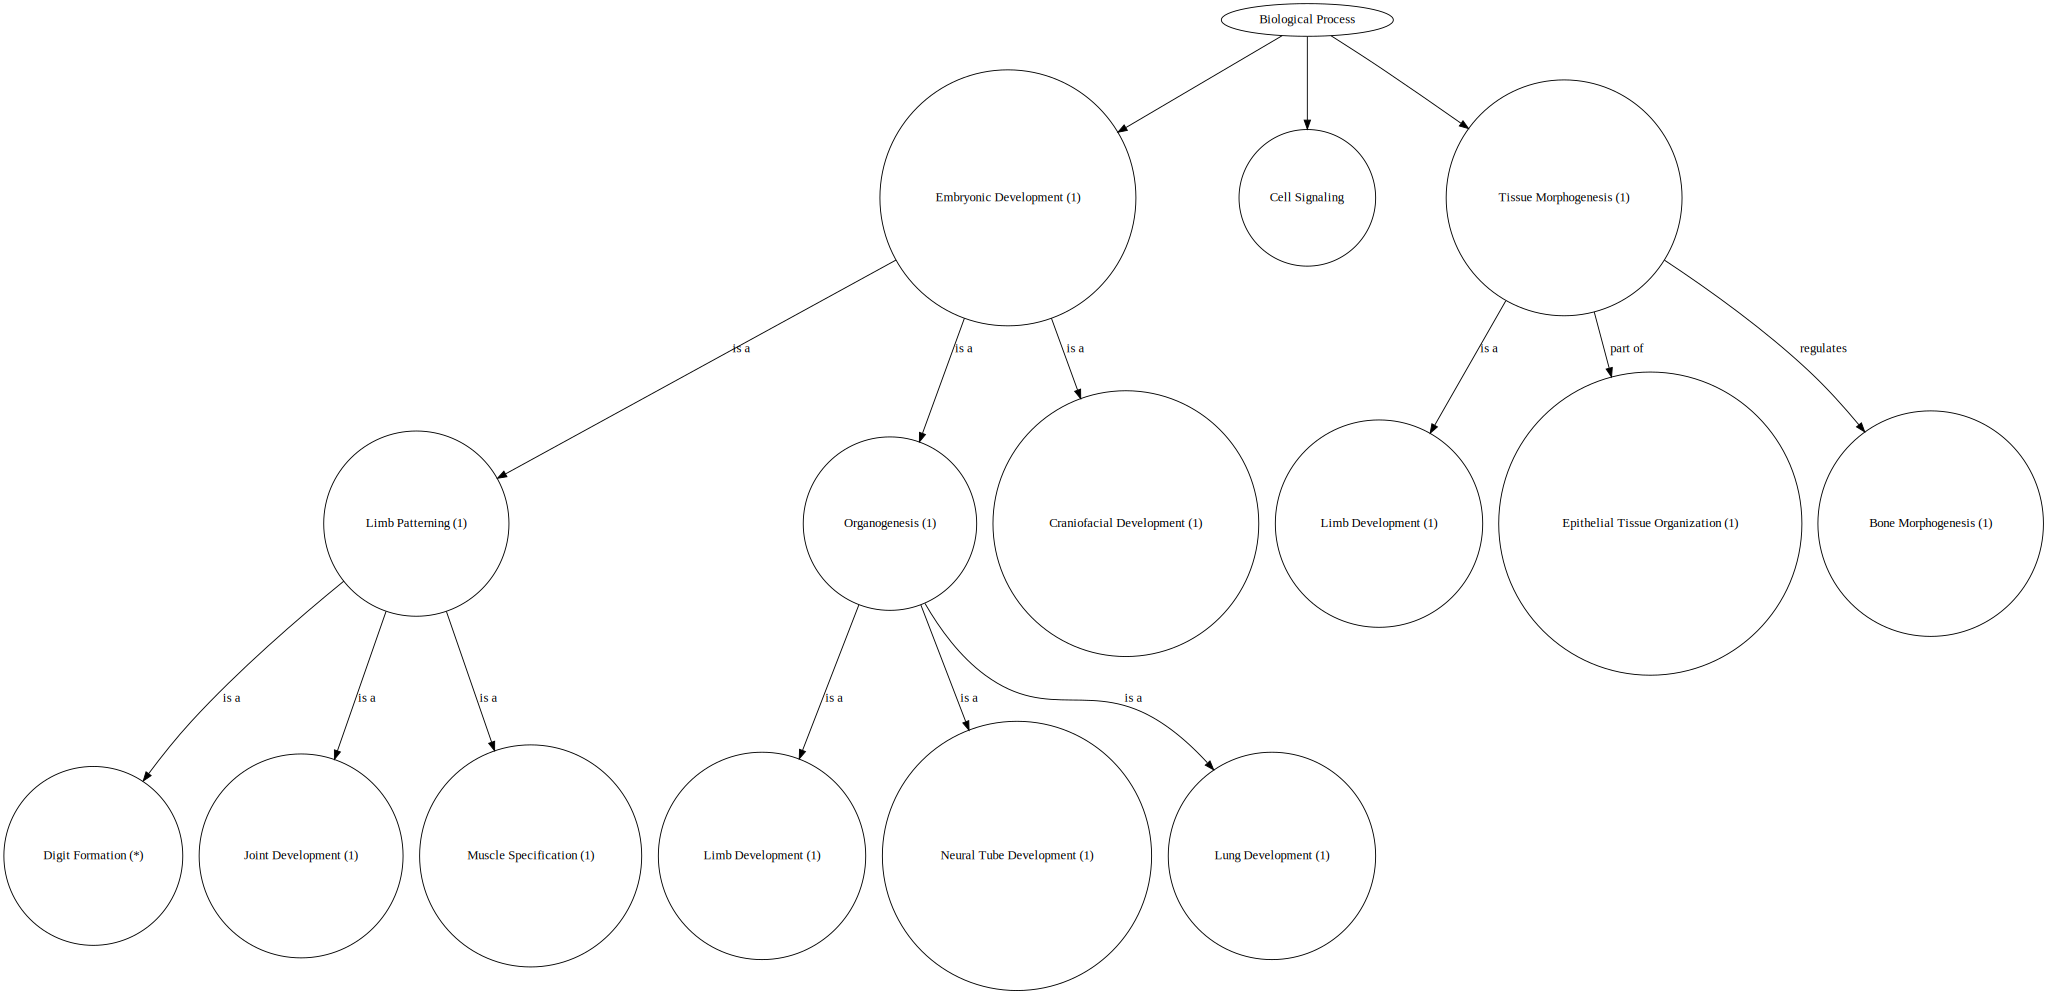

In [13]:
dot